# ECG Noise Sources

This tutorial covers the noise sources that are commonly found in electrocardiogram (ECG) recordings, and how to remove these sources. This material follows closely from the references listed below, so please refer to these for additional details. Note that this tutorial covers only a small subset of available methods for removing ECG noise. 

The filtering codes are written in Python3. 

## Baseline Drift

Baseline drift (or baseline wander) is a low-frequency noise component caused by breathing and other types of slow body motion, or by improper electrode contact with the skin. This noise component is typically in the range of 1Hz to a few Hz, and can cause problems with peak detection and analysis. The figure below (taken from [2]) shows an ECG signal corrupted by baseline drift.

![baselineDrift.png](images/baselineDrift.png)
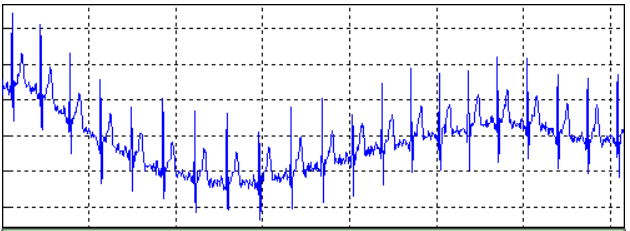

## Channel Noise

As with the transmission of communications signals through noisy channels, the ECG signal can become corrupted by noise as it passes through electronic channels. This noise is typically modeled as additive white Gaussian noise in all frequencies.

## Power Line Noise

50/60Hz noise (and its harmonics) can appear in ECG signals due to electromagnetic interference from power lines. This typically results from improper grounding of either the ECG machine or the patient (or both). This noise can be problematic for analyses that require accurate measurements of the P and T waves as it overlaps the frequency content of these waves. The figure below (taken from [2]) shows an example of an ECG signal with power line noise.

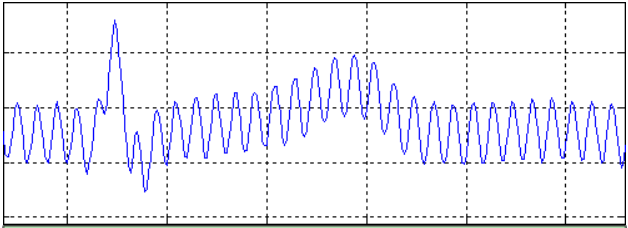

## Electromyogram (EMG) Noise

EMG noise is noise derived from muscle activity. This is high frequency noise with a typical maximum frequency of around 10 kHz. EMG noise is particularly problematic when collecting ECG signals during periods of exercise or high bodily activity. Removal of this noise is complicated by the fact that its frequency band can overlap that of the ECG's PQRST complex. The figure below (taken from [2]) shows an example of an ECG signal with high frequency noise.

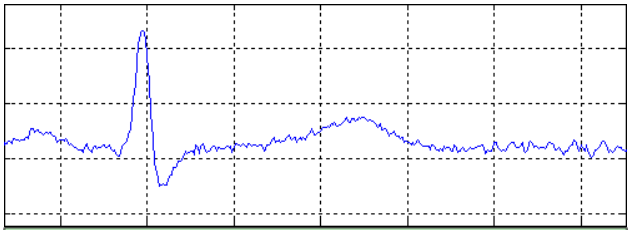

## Electrode Motion Noise

Any motion of the electrode can introduce noise, typically in the range of 1 - 10 Hz, into the ECG signal. This is another noise source that is difficult to combat since it overlaps with the frequency of the PQRST complex. Ideally, the patient will remain perfectly still during ECG collection as this is the best way of minimizing this noise. The figure below (taken from [3]) shows an ECG signal corrupted by electrode motion noise.

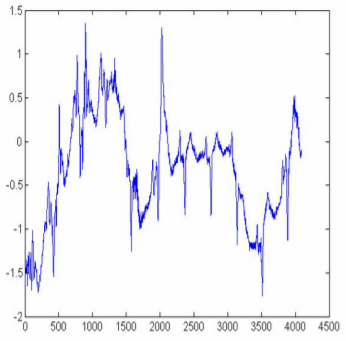

# Filtering Common ECG Noise Sources

A large body of literature exists for detailing the many methods of filtering noise from ECG signals. These include IIR filters, FIR filters, adaptive filters, discrete wavelet transforms, bionic wavelet transforms, empirical mode decomposition, etc. The choice of filtering method depends on the type of analysis being performed, and more sensitive analyses of the full PQRST complex require more sophisticated filtering approaches. Since our goal is to detect and localized the R peak and segment the individual heartbeats, we can adopt a more basic approach.  

## Butterworth Filter

We will assume that the ECG data is collected from our patients under controlled conditions when the patients are at rest and relatively immobile. Thus, we can assume that EMG and electrode motion noise is held at a minimum. Our primary concerns then are baseline drift at the low frequency end and powerline noise at the higher frequency end. Since the frequency band of the PQRST complex lies in the middle of this region, we can use a simple bandpass filter to reject noise outside of the desired band. We will use a third-order Butterworth filter for this purpose, the frequency response for which is shown below. This filter is designed to reject frequencies below 1 Hz and above 20 Hz.  

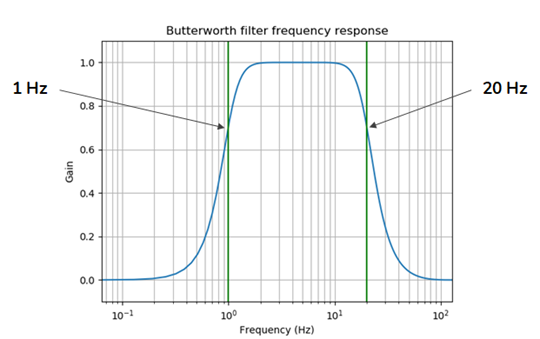

We can see the effects of applying this filter to a noisy ECG signal in the figures below (original noisy signal on the left, filtered signal on the right).

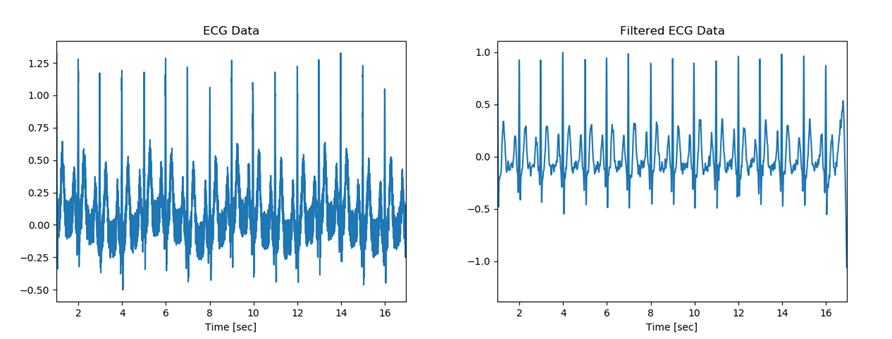

# Filtering ECG Signals with Python

Now let us use Python to filter ECG signals as discussed above. We start by importing some Python libraries that we will need to use for this exercise:

In [17]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Next, we read the ECG data into a pandas dataframe. Note that this dataset is simulated ECG data saved in the form of a single-row .csv file.

In [18]:
dataPath = 'ecgsyn_data.csv'
data = pd.read_csv(dataPath, header=None).iloc[0]

To ensure that the frequency calculations are done correctly, we need to supply the sample rate for the ECG collection.

In [19]:
sampleRate = 256   # Hz
time = np.arange(len(data)) * (1.0/float(sampleRate))

Let's plot this raw ECG data to see what we are dealing with:

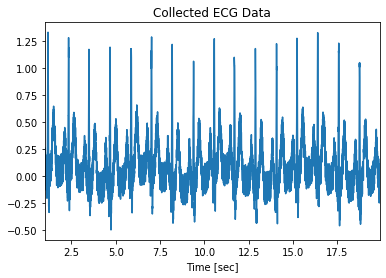

In [20]:
plt.figure()
plt.plot(time, data)
plt.xlabel('Time [sec]')
plt.title('Collected ECG Data')
plt.xlim([1.0, time[-10]])
plt.show()

Now we can create and apply the Butterworth filter to remove the low and high frequency noise sources from the ECG data. We set the limits of this bandpass filter at 1 Hz and 20 Hz.

In [21]:
fn = 0.5 * sampleRate   # Nyquist frequency
f_low = 1.0/fn
f_high = 20.0/fn
# Create Butterworth filter
b, a = signal.butter(3, [f_low, f_high], 'bandpass')
w, h = signal.freqz(b, a, worN=2000)
# Pass the data through the filter and save to outputDF
filtData = signal.filtfilt(b, a, data)

We now plot the resulting noise-removed data:

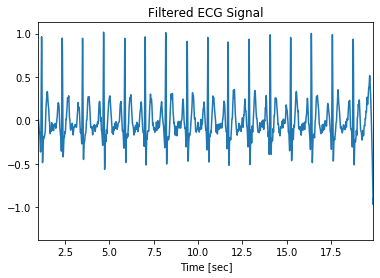

In [22]:
plt.figure()
plt.plot(time, filtData)
plt.xlabel('Time [sec]')
plt.title('Filtered ECG Signal')
plt.xlim([1.0, time[-10]])
plt.show()

## References

1. Aswathy Velayudhan and Soniya Peter, "Noise Analysis and Different Denoising Techniques of ECG Signal - A Survey," IOSR Journal of Electronics and Communication Engineering, 2016.
2. Tatiana S. Lugovaya, https://www.physionet.org/physiobank/database/ecgiddb/biometric.shtml, (accessed October 2019).
3. Rahul Kher, "Signal Processing Techniques for Removing Noise from ECG Signals," Journal of Biomedical Engineering and Research, 2019.